# Assignment 2

**name:** Karl Frisk

**email:** kf222rj@student.lnu.se

In this Assignment, you will use Python to handle several exercises related to gradient descent, linear regression, logistic regression, etc.
All exercises are individual. 
We expect you to submit a Jupyter Notebook (i.e., pre-organized and provided through Moodle) and the .py files with the classes’ exercise implementations. 
Your submission should include all the datasets and files we need to run your programs (we will run your notebook). 
When grading your assignments, we will, in addition to functionality, also take into account code quality. 
We expect well-structured and efficient solutions.

In this assignment, you must implement all models as subclasses of MachineLearning-
Model. 
Since the class MachineLearningModel provides the abstract methods fit, predict,
and evaluate, your implementations should provide implementations for such methods.
Please check the documentation of MachineLearningModel to understand what these methods
should do, as well as what their input parameters are and what they should return as results.
You must also implement the classes DecisionBoundary, ROCAnalysis, and ForwardSelection
provided to you. 
Please check their documentation to understand what these methods
should do, what their input parameters are, and what they should return as results. All your
implementations of such classes will be used throughout this assignment.

## Lecture 2 - Linear and Polynomial Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class **RegressionModelNormalEquation** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree (i.e., an input parameter that
must be captured in the class constructor).

2. Implement a class **RegressionModelGradientDescent** that implements the abstract
class **MachineLearningModel**. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations.

3. Both implementations should be vectorized. When implementing these classes, your
vector β should start with all values as 0. In implementing the fit() method, ensure
you track how the cost function evolved over the number of iterations (i.e., store it in an
array you can retrieve after the model is built). This will be needed later in the assignment.

### Validation of your model implementation (1-4 Mandatory, 5-6 Non-mandatory)

1. **(Mandatory)** In this part, you will use a reduced version of the Boston Housing Dataset (housingboston.csv). We will use the first two input variables as the features in this part of the assignment. The last variable is the value to predict.
* **INDUS:** proportion of nonretail business acres per town.
* **RM:** average number of rooms per dwelling.
* **MEDV:** Median value of owner-occupied homes in $1,000s.

Read the dataset and store the values as vectors in the variables $X_e$ and $y$. For this part of the assignment, the degree of the polynomial for your models must be 1.

In [1]:
#--- Write your code here ---#

import numpy as np
from MachineLearningModel import RegressionModelNormalEquation as NE
from MachineLearningModel import RegressionModelGradientDescent as GD
import matplotlib.pyplot as plt

# Importing data
data = np.genfromtxt('datasets/housing-boston.csv', delimiter=',', skip_header=1)

# Assigning data to variables
X = data[:,:-1]
y = data[:,-1]


2. **(Mandatory)** Plot the dataset. You must plot two figures side by side (e g., use the subplot method), with the predicted value as the $y-axis$ and each variable on the $x-axis$. 

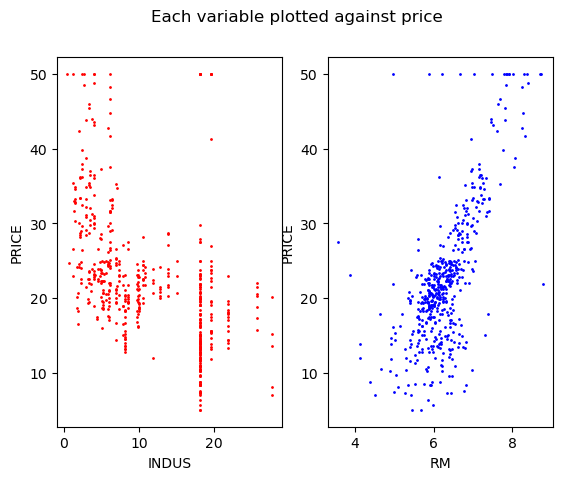

In [2]:
#--- Write your code here ---#

# Plot the data on separate plots for each feature
plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(X[:,0], y, 'r.', markersize=2)
plt.xlabel('INDUS')
plt.ylabel('PRICE')
plt.subplot(1, 2, 2)
plt.plot(X[:,1], y, 'b.', markersize=2)
plt.xlabel('RM')
plt.ylabel('PRICE')
plt.suptitle('Each variable plotted against price')
plt.show()


3. **(Mandatory)** Use your implementation of the regression model with the normal equation (RegressionModelNormalEquation) and report:

* The values for $\beta$. 

* The cost.

* The predicted value for an instance with values for INDUS and RM equals to $2.31, 6.575$, respectively.


In [3]:
#--- Write your code here ---#

# Set values to predict
x = np.array([[2.31, 6.575]])

# Initiate class instance
normal = NE(1)

# Fit data
normal.fit(X, y)

# Predict values
result = normal.predict(x)

# Print results
print(f'The predicted value when INDUS and RM equals to 2.31, 6.575\n respectively, is {result[0]}')

print()

print('The cost of the normal equation is', normal.cost)

print('The betas for this excercise are', normal.beta)


The predicted value when INDUS and RM equals to 2.31, 6.575
 respectively, is 27.758507548798068

The cost of the normal equation is 39.14548321146509
The betas for this excercise are [-22.89831573  -0.33471389   7.82205511]


4. **(Mandatory)** Now, normalize the input features, run the regression model with the normal equation, and report the same items. 
The predicted values for this experiment should be the same, but the $\beta$ values change. Why?

---- Your answers here ----

The resulting betas have changed after the normalization because the function we predict now uses a different scale of the input features while still predicting to the same results.

In [4]:
#--- Write your code here ---#

# Assign data
X = data[:,:-1]
y = data[:,-1]

# Compute mean and standard deviation
mean = np.mean(X, axis=0)
sdeviation = np.std(X, axis=0)

# Normalize data
X_norm = (X - mean)/sdeviation

# Initialize class
normal = NE(1)

# Fit data
normal.fit(X_norm, y)

# Predict values
result = normal.predict((x - mean)/sdeviation)

# Print results
print(f'The predicted value when INDUS and RM equals to 2.31, 6.575\n respectively, is {result[0]}')

print()

print('The betas for this excercise are', normal.beta)


The predicted value when INDUS and RM equals to 2.31, 6.575
 respectively, is 27.758507548798484

The betas for this excercise are [22.53280632 -2.29398525  5.49047659]


5. **(Non-Mandatory)** Now, you will work with your implementation of the gradient descent for any degree polynomial. In this part, you must compare how the cost function evolves by using your model using a non-normalized and a normalized instance of your RegressionModelGradientDescen class. 
    * You must plot two figures (e.g., use subplots) side by side to show how the cost evolves over 3000 iterations with a learning rate of $0.001$ using and not using feature normalization. 
    * Describe what is happening and why this happens (i.e., using or not normalization).        
    

---- Your answers here ----

Even though the not normalized regression converges faster the normalized has betas closer to the true values after 3000 iterations.
Why this happens I don't know, the graphs should be swapped for a normal case but maybe the normalization introduses noise or something.

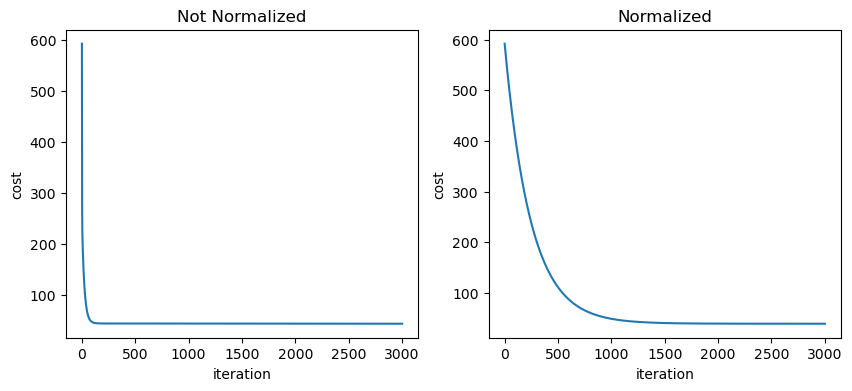

In [5]:
#--- Write your code here ---#

# Not normalized data
X = data[:,:-1]
y = data[:,-1].reshape(-1,1)

# Normalized data
X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)

# Initialize a regression instance
iterations = 3000
nonorm = GD(1, learning_rate=0.001, num_iterations=iterations)
norm = GD(1, learning_rate=0.001, num_iterations=iterations)

# Fit the data
nonorm.fit(X, y)
norm.fit(X_norm, y)

# Plot the cost evolution
plt.figure(1, figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(np.linspace(1, iterations, iterations), nonorm.list_of_cost)
plt.title('Not Normalized')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.subplot(1, 2, 2)
plt.plot(np.linspace(1, iterations, iterations), norm.list_of_cost)
plt.title('Normalized')
plt.xlabel('iteration')
plt.ylabel('cost')
plt.show()


6. **(Non-Mandatory)** Finally, find and plot a figure with the hyperparameter's learning rate and the number of iterations (using the normalized version) such that you get within a difference of 1\% of the final cost for the normal equation using this dataset.

--- Your answer here --- 

This plot shows that you need more iterations when you have a lower learning rate when compared to a higher learning rate.
Error used is relative error within 1%.

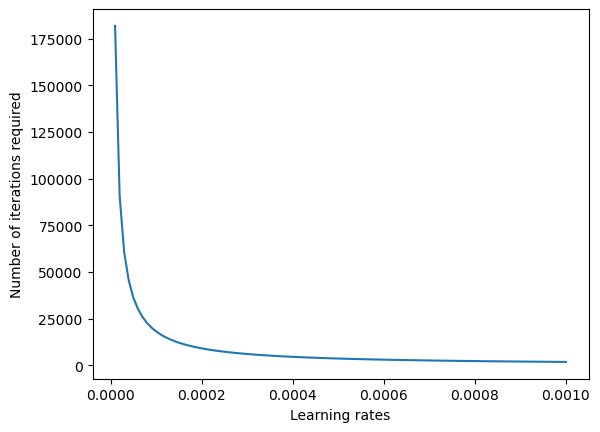

In [6]:
#--- Write your code here ---#

# Normalized data
X = data[:,:-1]
X_norm = (X - np.mean(X, axis=0))/np.std(X, axis=0)
y = data[:,-1].reshape(-1,1)

# What learning rates to be tested
learning_rates = np.linspace(1e-3, 1e-5, 100)

# Create empty array to contain the found values
results = np.empty((len(learning_rates),2))

# Iterate over the different learning values and register the amount of iterations it took to get within 1% of the true cost
for index, j in enumerate(learning_rates):

    gradient = GD(1, learning_rate=j)

    gradient.fit(X_norm, y, tol=1e-2)

    # Fill out the array such that the columns contain [(learning_rates), (iterations)]
    results[index][0], results[index][1] = gradient.learning_rate, gradient.count

# Plot results
plt.figure(1)
plt.plot(results[:,0], results[:,1])
plt.xlabel('Learning rates')
plt.ylabel('Number of iterations required')
plt.show()
        


## Lecture 2 - Testing your Multivariate Regression Model (1-2 Mandatory, 3 Non-mandatory)

In this exercise, we will use the file secret_polynomial.csv. The data consists of 400 x, y points generated from a polynomial with some Gaussian noise added.

1. **(Mandatory)** Start by creating a procedure to split the dataset into training and test sets. The proportion must be 80% for training and 20% for testing. Show your procedure working by plotting a figure with 3 subplots. The first plot must be the dataset with all data. The second must be the training set and the third the test set. 


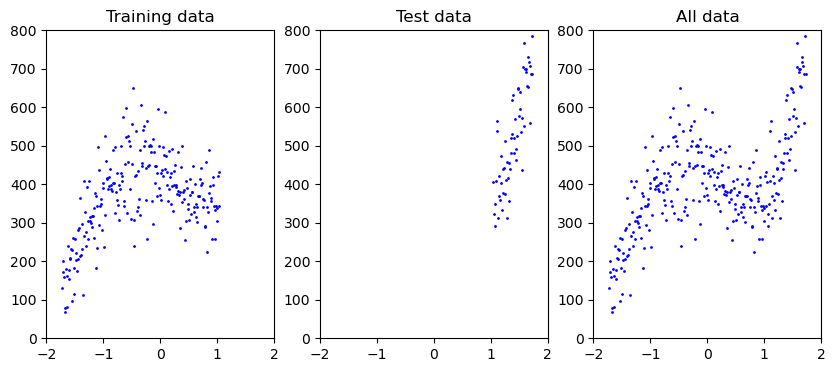

In [7]:
#--- Write your code here ---#

import numpy as np
import matplotlib.pyplot as plt
from MachineLearningModel import RegressionModelNormalEquation as NE

# Import data and normalize
data = np.genfromtxt('datasets/secret_polynomial.csv', delimiter=',', skip_header=1)
mean = np.mean(data[:,0], axis=0)
sdev = np.std(data[:,0], axis=0)
data[:,0] = (data[:,0] - mean) / sdev

# Compute split index
index = int(data.shape[0]*0.8)

# split index
X_train = data[:index, 0]
X_test = data[index:, 0]

y_train = data[:index, 1]
y_test = data[index:, 1]

# Plot training, test and all data
plt.figure(1, figsize=[10, 4])
plt.subplot(1, 3, 1)
plt.plot(X_train, y_train, 'b.', markersize=2)
plt.title('Training data')
plt.axis([-2, 2, 0, 800])
plt.subplot(1, 3, 2)
plt.plot(X_test, y_test, 'b.', markersize=2)
plt.title('Test data')
plt.axis([-2, 2, 0, 800])
plt.subplot(1, 3, 3)
plt.plot(data[:,0], data[:,-1], 'b.', markersize=2)
plt.title('All data')
plt.axis([-2, 2, 0, 800])
plt.show()


2. **(Mandatory)** Now fit and plot (e.g., using subplots) all polynomial models for degrees $d\in [1,6]$. Observe your figure and decide which degree gives the best fit. Motivate your answer.

--- Your answer here --- 

The best degree found seems to be degree = 4, but this is most likely a coincidence since I have some bias in my train/test split by only training on the first 80% in my data instead of randomly choosing the 80%, assuming there is some sort of ordering in the X-variable. This is very apparent in the degree = 2 plot.

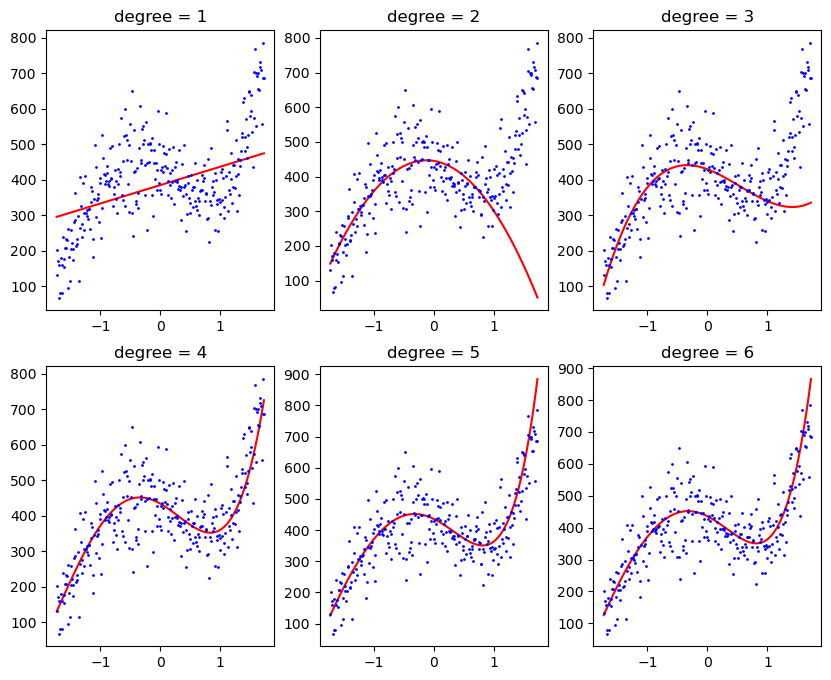

In [8]:
#--- Write your code here ---#

# Initialize a figure
plt.figure(2, figsize=[10, 8])

# Create x values for the function
x = np.linspace(5, 25, 100)

# Iterate over different degrees
for k in range(1, 7):

    # Initialize class
    normal = NE(k)

    # Fit data
    normal.fit(X_train, y_train)

    # Predict the function-values
    predictions = normal.predict((x - mean) / sdev)

    # Plot the resulting functions
    plt.subplot(2, 3, k)
    plt.plot((x - mean) / sdev, predictions, 'r-')
    plt.plot(data[:,0], data[:,1], 'b.', markersize=2)
    plt.title(f'degree = {k}')

plt.show()

3. **(Non-Mandatory)** To increase the confidence of your answer, you must divide the data into training and test sets and make repeated runs with shuffled data (at least 20 runs). You must decide on the best way to make this decision. By using this approach, what is your decision and why? 

--- Your answer here --- 

Turns out that my coincidence might not have been one since the same results follow after randomizing the train/test-split and averaging the RMSE's for the different degrees. The degree = 4 model is still on top considering the RMSE.

I used RMSE instead of MSE since a MSE in the 10000 range is not that intuitive.

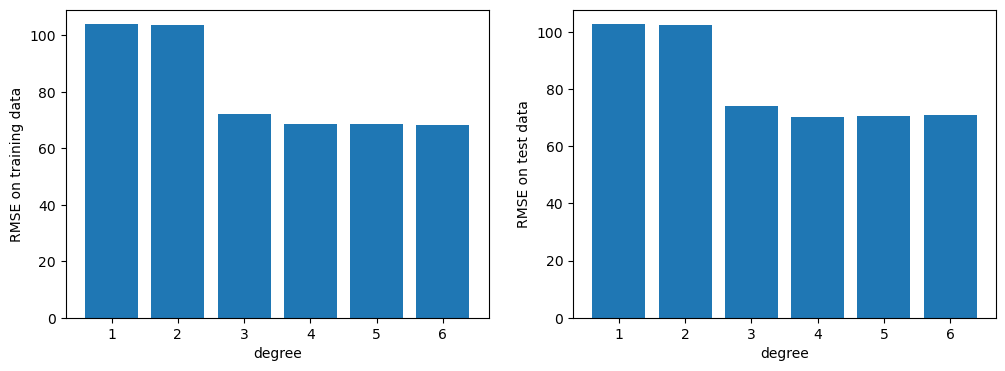

In [9]:
#--- Write your code here ---#

# Number of different seeds
s = 20

# Variable to decide if you want plots or not
# Higly recommend lowering number of seeds if True
plots = False

# Create MSE-score dictionaries
test_RMSE = {i:0 for i in range(1, 7)}
train_RMSE = {i:0 for i in range(1, 7)}

# Iterating over seeds
for seed in range(1, s + 1):

    # Decide on seed to use
    np.random.seed(seed)

    # Create indexing list
    indexes = np.arange(data.shape[0])
    np.random.shuffle(indexes)

    # Splitting data (80:20)
    split_idx = int(0.8 * len(data))
    
    X_train, X_test = data[indexes[:split_idx], 0], data[indexes[split_idx:], 0]
    y_train, y_test = data[indexes[:split_idx], 1], data[indexes[split_idx:], 1]

    if plots:
        # Initialize figure
        plt.figure(seed, figsize=[10, 8])

    # Iterate over degrees
    for k in range(1, 7):

        # Initialize class
        normal = NE(k)

        # Fit data
        normal.fit(X_train, y_train)

        # Predict train and test results
        predictions_train = normal.predict(X_train)
        predictions_test = normal.predict(X_test)

        # Compute RMSE for both training and test data
        train_RMSE[k] += np.sqrt(normal.evaluate(y_train, predictions_train))
        test_RMSE[k] += np.sqrt(normal.evaluate(y_test, predictions_test))

        if plots:
            # Sort the data to plot properly
            sorted_idx = np.argsort(X_test.ravel())

            # Plot the functions
            plt.subplot(2, 3, k)
            plt.plot(X_test[sorted_idx], predictions_test[sorted_idx], 'r-')
            plt.plot(X_train, y_train, 'b.', markersize=2)
            plt.title(f'degree = {k}')

    if plots:
        plt.show()

# Take the mean of the RMSE-scores
for c in test_RMSE:
    test_RMSE[c] /= s
    train_RMSE[c] /= s

# Plot the graphs
plt.figure(1, figsize=[12, 4])
plt.subplot(1, 2, 1)
plt.bar(train_RMSE.keys(), train_RMSE.values())
plt.xlabel('degree')
plt.ylabel('RMSE on training data')
plt.subplot(1, 2, 2)
plt.bar(test_RMSE.keys(), test_RMSE.values())
plt.xlabel('degree')
plt.ylabel('RMSE on test data')
plt.show()


## Lecture 3 - Logistic Regression

### Guidelines for model implementation (Mandatory)

1. Implement a class LogisticRegressionModel that implements the abstract class MachineLearningModel.
All methods should be implemented and properly documented.
This class receives parameters such as the learning rate and number of iterations. This
class should be implemented in a way that works for two classes only (i.e., 0 or 1).

2. Implement a class NonLinearLogisticRegressionModel that implements the abstract
class MachineLearningModel. All methods should be implemented and properly documented.
This class must work for polynomials of any degree and receive other parameters
such as the learning rate and number of iterations. This class should work for only two
input variables (e.g., X1 and X2, as discussed in class). This class should be implemented
in a way that works for two classes only (i.e., 0 or 1).

3. Both implementations should be vectorized. When implementing these classes, your vector
β should start with all values as 0. In your implementation of the evaluate function, ensure
you keep track of how the cost function evolved over the number of iterations. This will
be needed later in the assignment.

4. Remember that log(0) = undefined. Therefore, you may add a term epsilon = 1e-15 to
prevent this in using the np.log() function. Simply add this term inside the function, and
you will avoid such errors.

### Using your Implementations for the LogisticRegressionModel and the NonLinearLogisticRegressionModel (1-3 Mandatory, 4-6 Non-mandatory)

You will now try to classify bank notes as fake (0) or not (1). This dataset banknote_authentication.csv contains 1372 observations and has 2 features and (in column 3) binary labels of either fake (0) or not (1). Feature data were extracted using a Wavelet Transform tool from images of both fake and non-fake banknotes.

1. **(Mandatory)** Read and normalize the data. Plot the 2 variables in the x and y-axis. Use different colors to plot the classes (i.e., 0 or 1). You should plot two series to obtain this figure.  

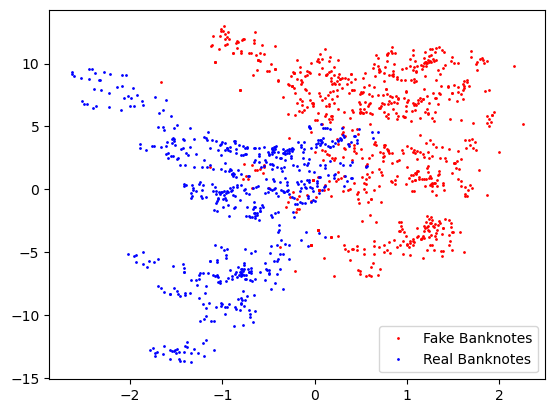

In [10]:
#--- Write your code here ---#

import numpy as np
from matplotlib import pyplot as plt
from MachineLearningModel import LogisticRegression as LR
from MachineLearningModel import NonLinearLogisticRegression as NLR

# Import data
data = np.genfromtxt(r'datasets\banknote_authentication.csv', delimiter=',', skip_header=1)

# Normalize data
mean = np.mean(data[:,:-2], axis=0)
sdev = np.std(data[:,:-2], axis=0)
data[:,:-2] = (data[:,:-2] - mean) / sdev

# Create a filter for fake and real banknotes
filter_fake = (data[:,-1] == 0)
filter_real = (data[:,-1] == 1)

# Assign the data
X_fake = data[:,0][filter_fake].reshape(-1, 1)
X_real = data[:,0][filter_real].reshape(-1, 1)
Y_fake = data[:,1][filter_fake].reshape(-1, 1)
Y_real = data[:,1][filter_real].reshape(-1, 1)

# Plot figure
plt.figure(1)
plt.plot(X_fake, Y_fake, 'r.', markersize=2)
plt.plot(X_real, Y_real, 'b.', markersize=2)
plt.legend(['Fake Banknotes', 'Real Banknotes'])
plt.show()


2. **(Mandatory)** Separate a validation set with 20\% of the data. We will call the remaining 80\% a sub-dataset.

In [11]:
#--- Write your code here ---#

np.random.seed(42)

# Randomize the split
indexes = np.arange(data.shape[0])
np.random.shuffle(indexes)

# Splitting data (80:20)
split_idx = int(0.8 * len(data))

# Assign data
X_sub = data[indexes[:split_idx], :-1]
X_val = data[indexes[split_idx:], :-1]
y_sub = data[indexes[:split_idx], -1].reshape(-1,1)
y_val = data[indexes[split_idx:], -1].reshape(-1,1)



3. **(Mandatory)** Your task now is to decide on a learning rate and the number of iterations that would work well for your implementations of the LogisticRegression and your NonLinearLogisticRegression. The degree for the NonLinearLogisticRegression model must be 2. Create a figure for each model showing the learning rate and number of iterations and plot the cost function $J(\beta)$ as a function over iterations. This approach must use the sub-dataset (the 80\%) from step 2. Discuss your choice for an appropriate learning rate and the number of iterations.

--- Your answer here --- 

A good iteration number seems to be aroud 3000, maybe even lower, while the best learning rate seems to be 0.03 which offers the best convergence over a smaller iteration-number. We also see that after a certain point (learning rate = 0.05) we see minimal improvements.

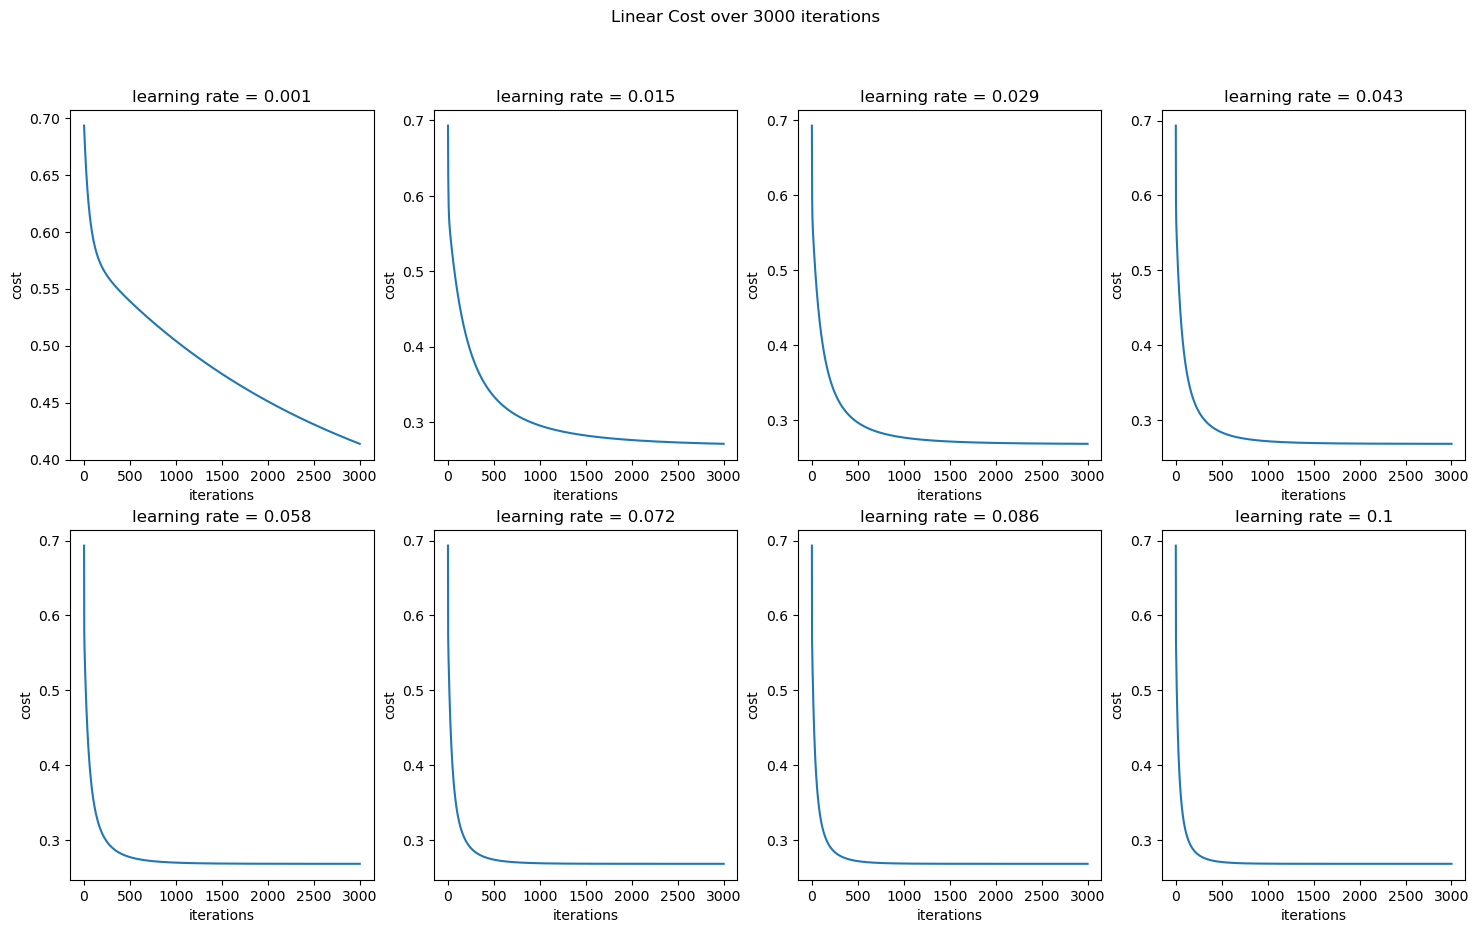

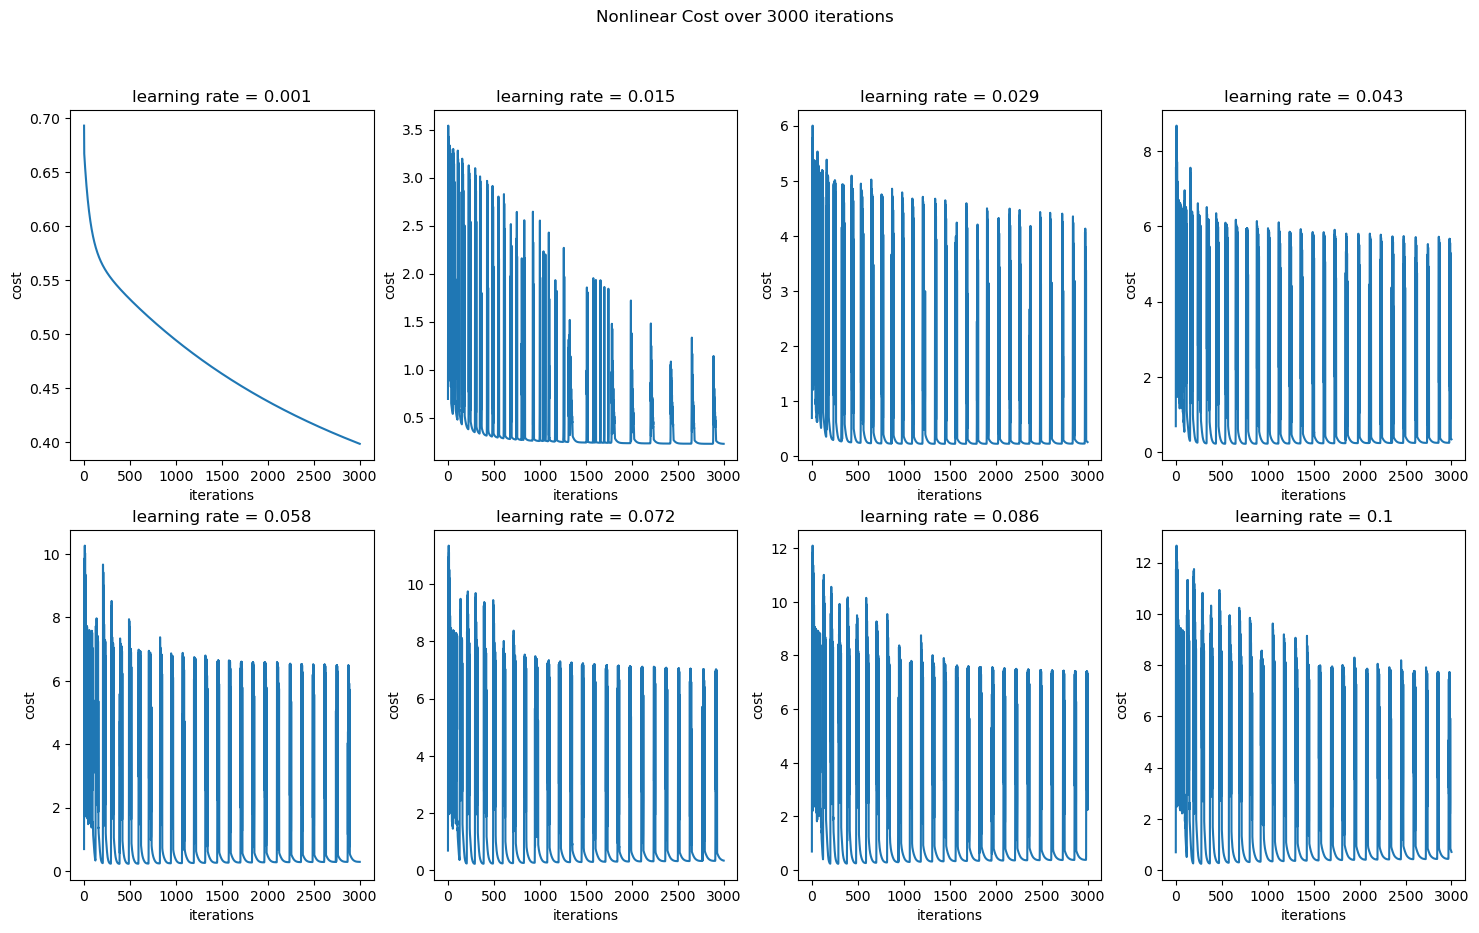

In [12]:
#--- Write your code here ---#

# Number of iterations to run
iterations = 3000

# Create vector for cost-evolution
x = np.linspace(1, iterations, iterations)

# Create array of learning rates to be tested
learning_rates = np.linspace(1e-3, 1e-1, 8)

# Initialize figure 1
plt.figure(2, figsize=[18, 10])

# Iterate over learning rates
for k, c in enumerate(learning_rates):

    # Run model
    linear_logistic = LR(learning_rate=c, num_iterations=iterations)
    linear_logistic.fit(X_sub, y_sub)
    predictions_linear = linear_logistic.predict(X_val)

    # Plot subfigure
    plt.subplot(2, 4, k + 1)
    plt.plot(x, linear_logistic.list_of_cost)
    plt.title(f'learning rate = {round(c, 3)}')
    plt.xlabel('iterations')
    plt.ylabel('cost')

# plot figure 1
plt.suptitle(f'Linear Cost over {iterations} iterations')
plt.show()

# Initialize figure 1
plt.figure(2, figsize=[18, 10])

# Iterate over learning rates
for k, c in enumerate(learning_rates):
    
    # Run model
    nonlinear_logistic = NLR(learning_rate=c, degree=2, num_iterations=iterations)
    nonlinear_logistic.fit(X_sub, y_sub)
    predictions_nonlinear = nonlinear_logistic.predict(X_val)

    # Plot subplot
    plt.subplot(2, 4, k + 1)
    plt.plot(x, nonlinear_logistic.list_of_cost)
    plt.title(f'learning rate = {round(c, 3)}')
    plt.xlabel('iterations')
    plt.ylabel('cost')

# plot figure 1
plt.suptitle(f'Nonlinear Cost over {iterations} iterations')
plt.show()



5. **(Non-Mandatory)** Repeat 20 times your experiments (i.e., using different seeds) with the decided learning rate and the number of iterations (step 2) using 20 different sub-datasets generated by your method from step 4. Report as a box-plot all accuracies (i.e., percentage of correct classifications) reported by each model in these 20 runs. Compare and discuss the two models. Are they qualitatively the same? Why?

--- Your answer here --- 

It seems as though the linear model performs "slightly" better compared to the non-linear one although the difference is negligable, so the two models would qualitatively be the same.

This most likely happens beacause of how the data looks and is most effectively split up with a straight line rather than a parabola. I tested with higher degrees (degree = 3) and some do perform (slightly) better than the quadratic model.

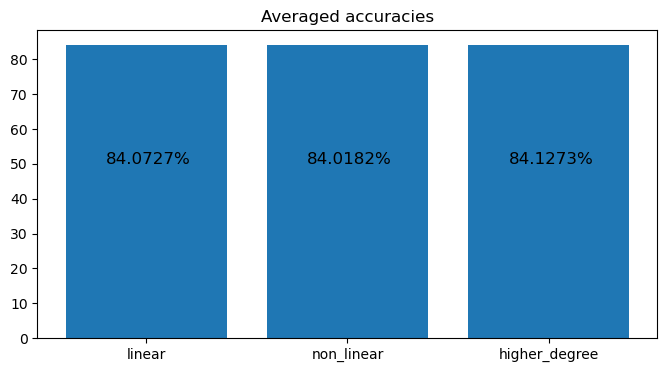

In [13]:
#--- Write your code here ---#

# Number of different seeds
s = 20

# Variable to decide if you want plots or not
plots = False

# Create accuracy dictionary
accuracy = {'linear':0, 'non_linear':0, 'higher_degree':0}

# Iterating over seeds
for seed in range(1, s + 1):

    # Decide on seed to use
    np.random.seed(seed)

    # Create indexing list
    indexes = np.arange(data.shape[0])
    np.random.shuffle(indexes)

    # Splitting data (80:20)
    split_idx = int(0.8 * len(data))
    
    X_sub = data[indexes[:split_idx], :-2]
    X_val = data[indexes[split_idx:], :-2]
    y_sub = data[indexes[:split_idx], -1].reshape(-1,1)
    y_val = data[indexes[split_idx:], -1].reshape(-1,1)
    

    # Run the models
    linear = LR(learning_rate=0.03, num_iterations=3000)
    non_linear = NLR(learning_rate=0.03, num_iterations=3000)
    higher_degree = NLR(degree=3, learning_rate=0.03, num_iterations=3000)

    linear.fit(X_sub, y_sub)
    non_linear.fit(X_sub, y_sub)
    higher_degree.fit(X_sub, y_sub)

    linear_result = linear.predict(X_val)
    non_linear_result = non_linear.predict(X_val)
    higher_degree_result = higher_degree.predict(X_val)

    # Add the accuracies
    accuracy['linear'] += linear.evaluate(y_val, linear_result)
    accuracy['non_linear'] += non_linear.evaluate(y_val, non_linear_result)
    accuracy['higher_degree'] += higher_degree.evaluate(y_val, higher_degree_result)

# Compute the averaged accuracies
for c in accuracy:
    accuracy[c] /= s / 100

# Plot the results
plt.figure(1, figsize=[8, 4])
plt.bar(accuracy.keys(), accuracy.values())
for i, (key, value) in enumerate(accuracy.items()):
    plt.text(i - 0.2, 50, f'{round(value, 4)}%', size=12)
plt.title('Averaged accuracies')
plt.show()


6. **(Non-Mandatory)** Now plot the decision boundary using a similar code to the one provided in class. You must plot the decision boundaries for the normalized data, use both models (LinearLogisticRegression and NonLinearLogisticRegression) and your choice of hyperparameters (step 3), totaling two figures. You must fit your model on the subdataset, but plot the validation dataset only in the figure.  The models that were fit are the ones to be used to create the decision boundary. Report also the accuracies for the two models.  Discuss your results (e.g., similarities, differences, etc) for accuracy and the decision boundary plots.

--- Your answer here --- 

I have found that these models are not quite as similar as the last task had me think. The linear model is very fast and, well, simple, since it converges very fast towards the minima. The nonlinear model is on the other hand a lot slower to converge when you test higher degrees, given that you use the same learning rates of course.

The linear model is actually capped at around 90% accuracy unless you get a very biased seed, while the nonlinear model can perform as high as up to 93-94% given enough iterations and low enough learning rate.

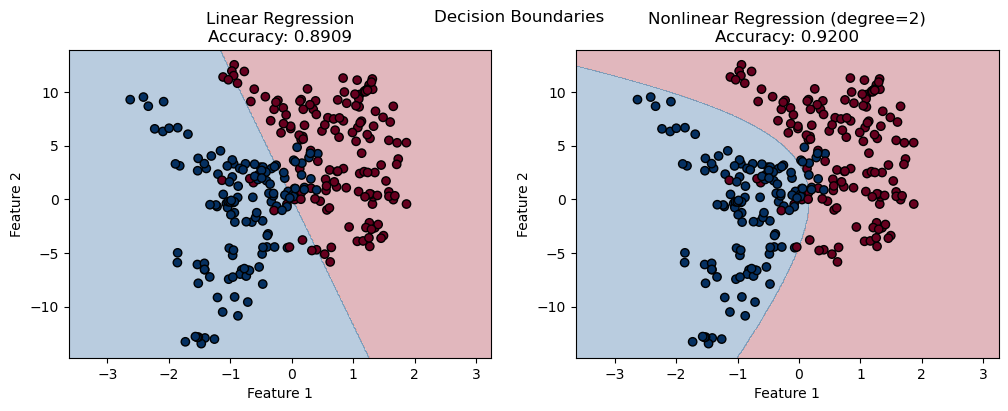

In [14]:
#--- Write your code here ---#

np.random.seed(42)

# Randomize the split
indexes = np.arange(data.shape[0])
np.random.shuffle(indexes)

# Splitting data (80:20)
split_idx = int(0.8 * len(data))

# Assign data
X_sub = data[indexes[:split_idx], :-1]
X_val = data[indexes[split_idx:], :-1]
y_sub = data[indexes[:split_idx], -1].reshape(-1,1)
y_val = data[indexes[split_idx:], -1].reshape(-1,1)

# The degree of the nonlinear model's polynomial
non_linear_degree = 2

# learning rate and number of iterations to be used
learning_rate, iterations = 0.001, 100000

# Run the models with the subset-data
linear = LR(learning_rate=learning_rate, num_iterations=iterations)
linear.fit(X_sub, y_sub, pure_powers=False)

non_linear = NLR(degree=non_linear_degree, learning_rate=learning_rate, num_iterations=iterations)
non_linear.fit(X_sub, y_sub, pure_powers=False)

linear_result = linear.predict(X_val, pure_powers=False)
non_linear_result = non_linear.predict(X_val, pure_powers=False)

# step size in the mesh
h = 0.01

# Create upper and lower bounds for the graphs and meshgrid
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

# Create a meshgrid with the bounds
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# flatten grid into 2D array
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Expand features into polynomial:
linear_Xe_grid = np.c_[np.ones((grid_points.shape[0], 1)), grid_points]
non_linear_Xe_grid = non_linear.mapFeature(grid_points[:,0], grid_points[:,1], non_linear_degree)

# Predict every point in the meshgrid
linear_p = (linear._sigmoid(linear_Xe_grid @ linear.beta) >= 0.5).astype(int)
linear_p = linear_p.reshape(xx.shape)

non_linear_p = (non_linear._sigmoid(non_linear_Xe_grid @ non_linear.beta) >= 0.5).astype(int)
non_linear_p = non_linear_p.reshape(xx.shape)

# Evaluate the models
linear_accuracy = linear.evaluate(y_val, linear_result)
non_linear_accuracy = non_linear.evaluate(y_val, non_linear_result)

# Plot the grids
plt.figure(1, figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, linear_p, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_val[:,0], X_val[:,1], c=y_val.ravel(), edgecolors='k', cmap=plt.cm.RdBu)
plt.title(f'Linear Regression\nAccuracy: {linear_accuracy:.4f}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, non_linear_p, alpha=0.3, cmap=plt.cm.RdBu)
plt.scatter(X_val[:,0], X_val[:,1], c=y_val.ravel(), edgecolors='k', cmap=plt.cm.RdBu)
plt.title(f'Nonlinear Regression (degree={non_linear_degree})\nAccuracy: {non_linear_accuracy:.4f}')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.suptitle("Decision Boundaries")
plt.show()


## Lecture 4 - Model Selection and Regularization

### Guidelines for model implementation (Mandatory)

* Implement a class **ROCAnalysis** that calculates the metrics: TP-rate, FP-rate, precision, recall (i.e., same as tp-rate) and f-score.
* Implement a class **ForwardSelection** that implements the feature forward selection algorithm seen in class. This process must use 80% (i.e., fitting the data) of the data for training the models and 20% (i.e., predicting in unseen data) for testing. This method should optimize your problem regarding the TP-rate metric. You must use your implementation of the **ROCAnalysis** class.

For this exercise, you will use the *heart_disease_cleveland.csv* dataset. The dataset contains 13 numerical features, and the last feature is the target variable, which we have to predict. The value of 1 means the patient is suffering from heart disease, and 0 means the patient is normal.

### Using your implementations of ROCAnalysis and ForwardSelection (All Mandatory)

1. **(Mandatory)** Start by normalizing the data and separating a validation set with 20\% of the data randomly selected. The remaining 80\% will be called the sub-dataset.

In [15]:
#--- Write your code here ---#

import numpy as np
from matplotlib import pyplot as plt
from MachineLearningModel import LogisticRegression as LR
from ForwardSelection import ForwardSelection
from ROCAnalysis import ROCAnalysis

# Only need pandas to display the metrics neatly
import pandas as pd

# Import data
data = np.genfromtxt(r'datasets\heart_disease_cleveland.csv', delimiter=',', skip_header=1)

# Normalize data
mean = np.mean(data[:,:-1], axis=0)
sdev = np.std(data[:,:-1], axis=0)
data[:,:-1] = (data[:,:-1] - mean) / sdev


np.random.seed(1000)

# Randomize the split
indexes = np.arange(data.shape[0])
np.random.shuffle(indexes)

# Splitting data (80:20)
split_idx = int(0.8 * len(data))

# Assign data
X_sub = data[indexes[:split_idx], :-2]
X_val = data[indexes[split_idx:], :-2]
y_sub = data[indexes[:split_idx], -1].reshape(-1,1)
y_val = data[indexes[split_idx:], -1].reshape(-1,1)

2. **(Mandatory)** Use your implementation of forward selection to estimate a reasonable classification model. You must use your implementation of Logistic Regression in this assignment. The decision to make a reasonable number of iterations and learning rate is up to you but must be justified. Optimize the model selection to produce the best f-score. You must use the sub-dataset in your forward selection process. Report the features selected by this process and discuss your results. 

--- Your answer here --- 

I found a couple interesting things.

First; that a lower learning rate goves a better f-score and in general more features chosen by the FFS. Although not completely unexpected since it is in theory better to have a lower learning rate to get a more precise minima and not oscillate around the minima or even diverge from it.

Second; that a higher number of iterations gave a lower f-score and less features chosen. This may be from the model converging too much on the earlier tries and thus not finding a better feature to add to the set of features. This should then in theory be the best combination of samples, but simple trial and error disproves that by finding a higher f-score with fewer iterations.

Third; that the FFS is *VERY* dependent on the seed chosen. If you try the seed 42 you get an f-score of 0.59 with only two features chosen, while if you choose the seed 1000 you get an f-score of 0.84 with eight features chosen. Clearly stating the need to run multiple iterations to be sure you are not just lucky/unlucky.

In [16]:
#--- Write your code here ---#

# Aquire feature names
features = np.genfromtxt(r'datasets\heart_disease_cleveland.csv', delimiter=',', names=True, encoding='utf-8-sig')

# Initiate a model
logistic = LR(learning_rate=0.001, num_iterations=1000)

# Initiate a Feature Forward instance
FFS = ForwardSelection(X_sub, y_sub, logistic)

# Run the feature forward algorithm and fit the data on the best model found
FFS.fit()

# Predict if heart disease found or not using the best model
results_best = FFS.predict(X_val)

# Analyse the results
roc = ROCAnalysis(results_best, y_val)

# Print which features were used and the f-score
print(f'Selected features {[features.dtype.names[f] for f in FFS.selected_features]}, with an f-score of {roc.f_score()}')


Selected features ['cp', 'thalach', 'sex', 'ca', 'exang', 'slope', 'oldpeak', 'fbs'], with an f-score of [0.84745763]


3. **(Mandatory)** Report the performance of the best model in the validation set regarding all statistics available in your ROCAnalysis class. 
Was the process successful when compared to using all features?  
Discuss your results regarding these metrics and what you can conclude from this experiment.

--- Your answer here --- 

The process of not using all features was indeed successfull considering all positive scores were higher on the best model compared to the model using all features.

Why this happened? Not completely sure, but it may be since some features didn't correlate to heart diseases and thus "diluted" the models decision capabilities.

In [17]:
#--- Write your code here ---#

# Run model with all features
all_features = LR(learning_rate=0.001, num_iterations=1000)
all_features.fit(X_sub, y_sub)
results_all = all_features.predict(X_val)

# Analyse the results
roc_all = ROCAnalysis(results_all, y_val)


# Collect statistics on the best model
metrics_best_model = {
    "True Positive Rate": round(roc.tp_rate()[0], 4),
    "False Positive Rate": round(roc.fp_rate()[0], 4),
    "Precision": round(roc.precision()[0], 4),
    "F1-Score": round(roc.f_score(beta=1)[0], 4),
    "F0.5-Score": round(roc.f_score(beta=0.5)[0], 4),
    "F2-Score": round(roc.f_score(beta=2)[0], 4)
}

# Convert to DataFrame for tabular display
df_metrics_best_model = pd.DataFrame(metrics_best_model.items(), columns=["Metric", "Value"])

# Print the table
print('Statistics of best model:\n', df_metrics_best_model.to_string(index=False))

print()

# Collect statistics on the mmodel with all features
metrics_all_features = {
    "True Positive Rate": round(roc_all.tp_rate()[0], 4),
    "False Positive Rate": round(roc_all.fp_rate()[0], 4),
    "Precision": round(roc_all.precision()[0], 4),
    "F1-Score": round(roc_all.f_score(beta=1)[0], 4),
    "F0.5-Score": round(roc_all.f_score(beta=0.5)[0], 4),
    "F2-Score": round(roc_all.f_score(beta=2)[0], 4)
}

# Convert to DataFrame for tabular display
df_metrics_all_features = pd.DataFrame(metrics_all_features.items(), columns=["Metric", "Value"])

# Print the table
print('Statistics of model with all features:\n', df_metrics_all_features.to_string(index=False))


Statistics of best model:
              Metric  Value
 True Positive Rate 0.8333
False Positive Rate 0.1290
          Precision 0.8621
           F1-Score 0.8475
         F0.5-Score 0.8562
           F2-Score 0.8389

Statistics of model with all features:
              Metric  Value
 True Positive Rate 0.8000
False Positive Rate 0.2258
          Precision 0.7742
           F1-Score 0.7869
         F0.5-Score 0.7792
           F2-Score 0.7947


## Lecture 5 - Neural Networks

In this exercise you are allowed to use the scikit-learn package.

**(Mandatory)** First, load the digits dataset using *sklearn.datasets.load_digits*. Split the data into training and test sets (e.g., 80/20 split using train_test_split). Finally, plot 16 random images from the dataset in a 4×4 grid using matplotlib, with their labels displayed.

In [18]:
#--- Write your code here ---#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**(Mandatory)** Use MLPClassifier from *sklearn.neural_network*. 

Train an MLP on the training set and evaluate on the test set.

Then, use cross-validation (e.g., with GridSearchCV or cross_val_score) to explore:

* Number and size of hidden layers

* Activation functions: relu, tanh, logistic

* Learning rate strategies: constant, adaptive

* L2 regularization (alpha)

* Solvers: adam, sgd


Compare different configurations and choose the best-performing model.

Report cross-validation scores and final test accuracy.

--- Your answer here --- 

In [19]:
#--- Write your code here ---#

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100, 50)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Initialize MLP classifier
mlp = MLPClassifier(max_iter=5000, random_state=42, verbose=True, early_stopping=True)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Assign best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Predict test digits
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Iteration 1, loss = 8.10042600
Validation score: 0.229167
Iteration 2, loss = 2.84599691
Validation score: 0.305556
Iteration 3, loss = 2.01328920
Validation score: 0.437500
Iteration 4, loss = 1.31564519
Validation score: 0.625000
Iteration 5, loss = 0.92247160
Validation score: 0.770833
Iteration 6, loss = 0.67048658
Validation score: 0.826389
Iteration 7, loss = 0.49858341
Validation score: 0.854167
Iteration 8, loss = 0.38495117
Validation score: 0.902778
Iteration 9, loss = 0.30712124
Validation score: 0.909722
Iteration 10, loss = 0.25457075
Validation score: 0.923611
Iteration 11, loss = 0.21414132
Validation score: 0.937500
Iteration 12, loss = 0.18180201
Validation score: 0.937500
Iteration 13, loss = 0.15812771
Validation score: 0.937500
Iteration 14, loss = 0.13848423
Validation score: 0.944444
Iteration 15, loss = 0.12394628
Validation score: 0.944444
Iteration 16, loss = 0.11055683
Validation score: 0.944444
Ite

**(Non-mandatory)**  Plot the confusion matrix for your best model on the test set.

Which digits are often confused?

--- Your answer here --- 

A lot of eights were confused for ones and a five.

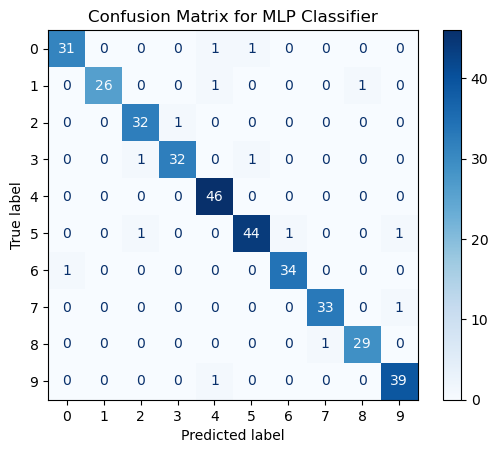

In [20]:
#--- Write your code here ---#

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for MLP Classifier")
plt.show()

**(Non-Mandatory)** Plot at least 10 misclassified images with predicted and true labels.

Try to identify patterns in the errors (e.g., similar-looking digits).

Are the misclassifications understandable for humans? Why or why not?

--- Your answer here --- 

Of all the numbers that were missclassified I can understand missclassifying an eight since it is the most common digit to mess upp by writing too thin, making it look like a one.

Fives could look like bad threes, and nines and sixes could look like messed up eights.

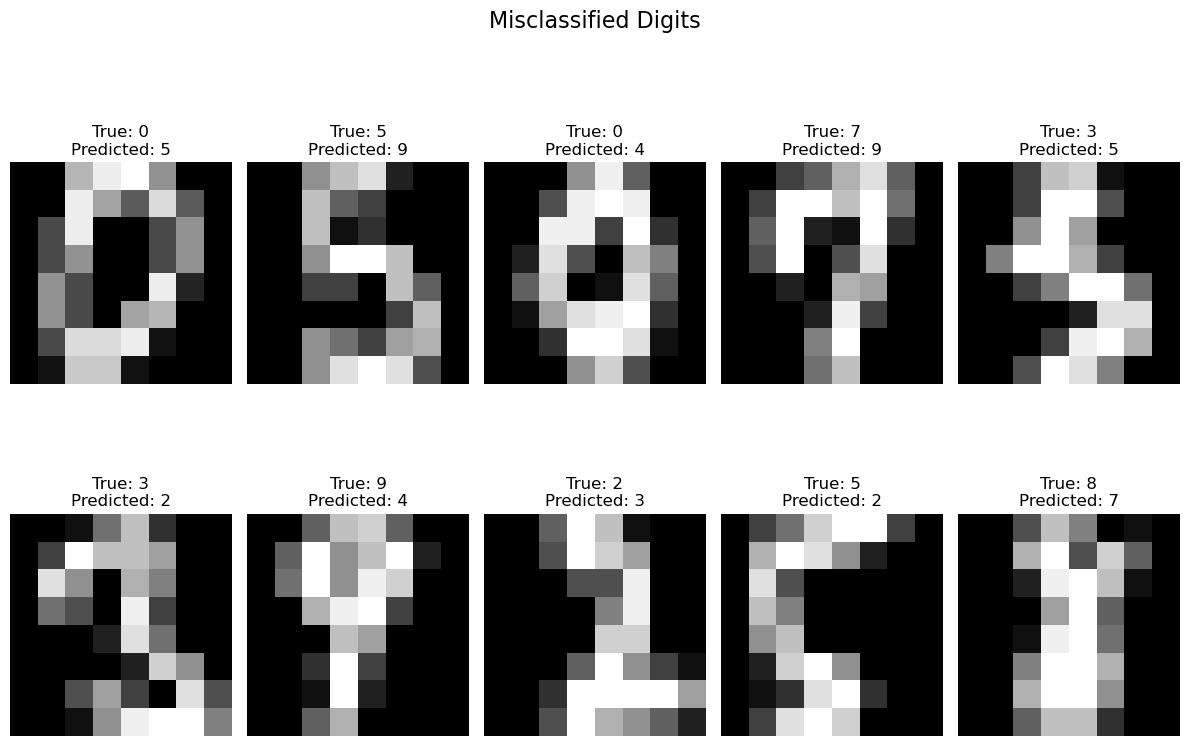

In [21]:
#--- Write your code here ---#

# Find misclassified indices
misclassified_idx = np.where(y_pred != y_test)[0]

# Plot the first N misclassified images
N = 10
plt.figure(figsize=(12, 8))
for i, idx in enumerate(misclassified_idx[:N]):
    plt.subplot(2, N // 2, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPredicted: {y_pred[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.suptitle("Misclassified Digits", fontsize=16, y=1.05)
plt.show()

**(Non-Mandatory)** 

Plot training/validation accuracy or loss over epochs if you're capturing it (using verbose=True or tracking manually).

How quickly does your model reach a stable accuracy or loss?

Is the training accuracy much higher than the validation accuracy?

Does the loss decrease on training but increase on validation?

--- Your answer here --- 

From the graphs below it takes 50 iterations/epochs to reach a stable accuracy.

The model's training accuracy should not be that much higher than the validation accuracy (considering the low loss level) meaning that the model is learning and isn't starting to memorize the dataset.

The loss is indeed decreasing on the training data since the model is improving on the training data. It should decrease in the beginning of the validation data because the model is starting to learn and after some amount of epochs it should start to slowly increase since the model has gone from generalizing well to overfitting the data. In my case the validation accuracy is not decreasing marginally since I used early_stopping=True in the model, thus "preventing" overfitting since we abort training after no more marginal gain is seen in the validation score.

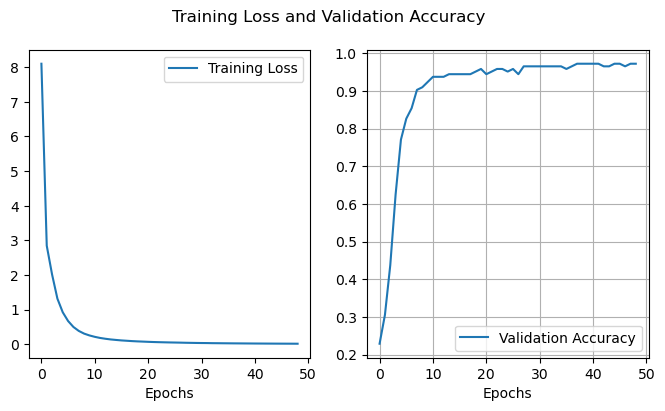

In [22]:
#--- Write your code here ---#

plt.figure(1, figsize=[8, 4])

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(best_model.loss_curve_, label='Training Loss')
plt.xlabel("Epochs")
plt.legend()

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(best_model.validation_scores_, label='Validation Accuracy')
plt.xlabel("Epochs")
plt.legend()

plt.suptitle("Training Loss and Validation Accuracy")
plt.grid(True)
plt.show()
